# 楽譜暗号を書いてみる('24.06.04)

## 暗号が隠された楽譜

楽譜の中に暗号を隠すということは、昔からされてきた。
たとえば、"The Sermon Booklets of Friar Nicholas Philip"と呼ばれる1432年の写本には、フィリップの暗号は、音符の音程と音が持続する長さで文字を暗号化する楽譜が描かれている。

%<img style="float:center;transform: rotate(0deg); height:8cm" src="./images/day_240604_Philip_Music_Cipher.jpg" />
```{figure} ./images/day_240604_Philip_Music_Cipher.jpg
---
height: 8cm
---
"The Sermon Booklets of Friar Nicholas Philip" (1436)の楽譜暗号
```

楽譜形式の暗号は少なからず存在していて、「交響曲の父」ヨーゼフ・ハイドンの弟ヨハン・ミヒャエル・ハイドンも、楽譜に埋め込む暗号を考案したと言われている。それが下の楽譜だ。

%<img style="float:center;transform: rotate(0deg); height:8cm" src="./images/day_240604_Michael_Haydn_Music_Cipher.jpg" />
```{figure} ./images/day_240604_Michael_Haydn_Music_Cipher.jpg
---
height: 8cm
---
ヨハン・ミヒャエル・ハイドンも、楽譜に埋め込む暗号(1808)
```

あるいは、2015年には"ナチスの財宝（95億円）のありかが書かれていると噂されてきた「謎の楽譜に隠された暗号」を解析したという人が現れたというニュースも評判になった。
ヒトラーの秘書の書類中に、不可解な注釈や記号が書かれた、ゴットフリード・フェダーラインという人物が作曲した『即興行進曲』の楽譜が含まれていて、財宝のありかが暗号として楽譜に書かれているのではないか？と噂されてきたものだ。（参考 [消えたナチスの財宝（95億円）の在処が判明？ヒトラーの秘書が残した謎の暗号とは？](https://tocana.jp/2015/06/post_6622_entry.html),[THE MARSCH-IMPROMPTU MUSIC SCORE](https://tearsofthewolf.com/marsch-impromptu)）

## 音の高さと長さでテキストを隠す暗号を作る

1432年のFriar Nicholas Philip"写本や、ヨハン・ミヒャエル・ハイドンが作ったとされる暗号と同じように、
音の高さと長さでテキストを隠す暗号を作ってみる。
暗号の形式は、[alan850627/music-cipher](https://github.com/alan850627/music-cipher/)で使われている形式を使うことにする。
使う文字は、大文字テキストのみということにして、まずは変換辞書を作る。
暗号辞書は、music21パッケージを使って楽譜作成することを前提に、music21で読み込める書式にしておく。

In [35]:
import string
import math

dic_A2G={0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'}
dic={}
for idx, char in enumerate(letters):
    dic[char]=str(dic_A2G[idx%7])+str(4*2**math.floor(idx/7))
print(dic)

{'A': 'A4', 'B': 'B4', 'C': 'C4', 'D': 'D4', 'E': 'E4', 'F': 'F4', 'G': 'G4', 'H': 'A8', 'I': 'B8', 'J': 'C8', 'K': 'D8', 'L': 'E8', 'M': 'F8', 'N': 'G8', 'O': 'A16', 'P': 'B16', 'Q': 'C16', 'R': 'D16', 'S': 'E16', 'T': 'F16', 'U': 'G16', 'V': 'A32', 'W': 'B32', 'X': 'C32', 'Y': 'D32', 'Z': 'E32'}


暗号化するテキストは"HELLO WORLD"ということにしてみよう。
それでは、楽譜に暗号化してみる。

In [ ]:
message='hello world'.replace(' ', '').strip().upper() # 空白などは、置換で除去される
letters = list(string.ascii_uppercase)
melody=[]
for c in message:
    melody.append(dic[c])

In [ ]:
import music21 as m21
import pathlib

# MusicScore 4ではOS Errorが起きるので 3を使う
m21.environment.set('musescoreDirectPNGPath', 
    pathlib.PosixPath('/Applications/MuseScore 3.app/Contents/MacOS/mscore'))
#us = environment.Environment()    

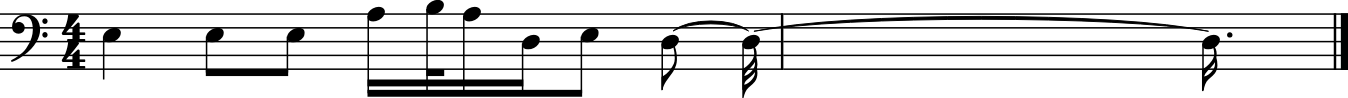

In [43]:
melody=m21.converter.parse('tinynotation: 4/4'+' '.join(melody))
melody.show()

ついでに、midiで"Hello World"というテキストを暗号化した「曲」も聴くことができるようにしてみた。
意外なことに、文字列"Hello World"から作られたメロディも悪くない。

In [44]:
melody.show('midi')

## ブラームスが恋人シーボルトの名前を楽譜に埋め込んだ!?

ヨハネス・ブラームスが1865年に作曲し弦楽六重奏曲第2番ト長調作品36には、恋人の名前を埋め込んだと言われている（参考 [弦楽六重奏曲第2番 (ブラームス)](https://ja.wikipedia.org/wiki/弦楽六重奏曲第2番_(ブラームス))）。
第1楽章の第2主題終結部でヴァイオリンがA－G－A－H－Eというメロディを、バイオリンが奏でる。
これは、恋人アガーテ・フォン・ジーボルト（Agathe von Siebold）の名前Agahteだという逸話がある。
ちなみに、アガーテ・フォン・ジーボルトは、江戸時代に日本を訪れたフィリップ・フランツ・バルタザール・フォン・シーボルトの親戚だ。

この逸話が真実なのかはさておき、楽譜に隠された暗号というのはロマンがあって面白い。